## Shakhawat Hassan

## Objective: Predicting Customer Churn

Business Objective: Minimize customer churn by proactively identifying high-risk customers and implementing targeted retention interventions.

Analytical Objective: Develop a predictive model for churn (binary classification: Churned vs. Stayed) using customer behavioral and transactional data.

Strategic Value: Retaining existing customers is significantly more cost-efficient than acquiring new ones; leveraging predictive insights enables data-driven retention strategies, improves ROI, and strengthens customer lifetime value.

## Data & Modeling Overview

Dataset: Customer transactional and behavioral data (7,000+ customers)

Features Used: Tenure, monthly spend, total charges, referrals, demographics, service types, payment methods, etc.

Preprocessing:
Handled missing values
Encoded categorical variables
Scaled/normalized numeric features where needed

Train/Test Split: 70% training, 30% testing

Class Imbalance Handling: Weighted models to account for fewer churners

Models Trained: Logistic Regression, Random Forest, XGBoost


## Load and Inspect the Data

In [7]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
customer_data = pd.read_csv("Customer Data.csv")

In [9]:
population_data = pd.read_csv("Zip Codes and Populations.csv")

In [10]:
#view data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Zip Code                           7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  6361 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [11]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [12]:
#look for null values
customer_data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Payment Method                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Customer Status                   

In [13]:
population_data.isnull().sum()

Zip Code      0
Population    0
dtype: int64

In [14]:
# Quick look at the datasets
customer_data.head()

,Customer ID,Gender,Age,Married,Zip Code,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Payment Method,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,93225,2,9,Yes,42.39,No,...,Yes,Credit Card,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,91206,0,9,Yes,10.69,Yes,...,No,Credit Card,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,92627,0,4,Yes,33.65,No,...,Yes,Bank Withdrawal,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,94553,1,13,Yes,27.82,No,...,Yes,Bank Withdrawal,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,93010,3,3,Yes,7.38,No,...,Yes,Credit Card,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [15]:
#check size
customer_data.shape

(7043, 26)

In [16]:
#check data type of the datasets
customer_data.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Payment Method                        object
Total Charges                        float64
Total Refunds                        float64
Total Extra Data Charges               int64
Total Long Distance Charges          float64
Total Reve

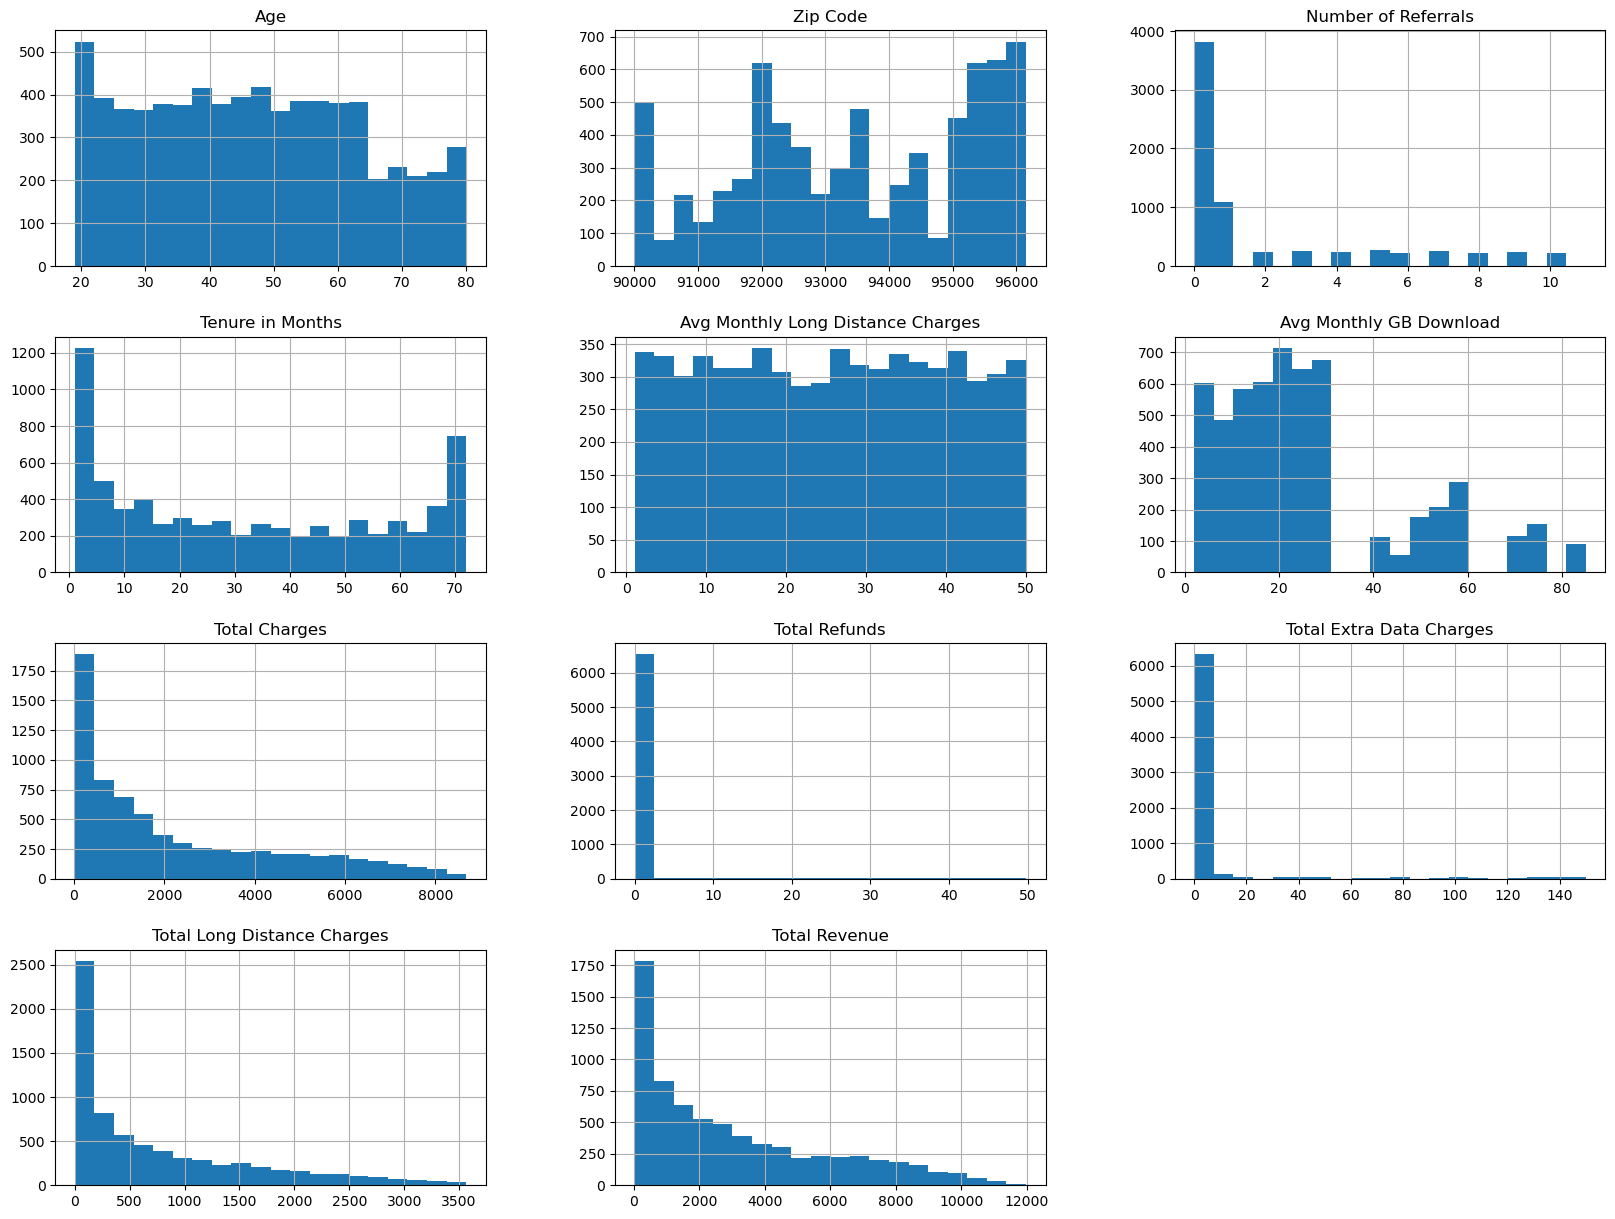

In [17]:
customer_data.hist(bins = 20, figsize = (20, 15))
plt.show()

## Prepare & Clean the Dataset

In [19]:
# Merge the population data
total_df = customer_data.merge(population_data, on="Zip Code", how="left")

#Target variable: Churned = 1, Stayed =0
total_df = total_df[total_df["Customer Status"].isin(["Churned", "Stayed"])]
total_df["Churn"] = total_df["Customer Status"].apply(lambda x:1 if x=="Churned" else 0)

#Fill missing values
total_df["Avg Monthly Long Distance Charges"] = total_df["Avg Monthly Long Distance Charges"].fillna(0)
total_df["Multiple Lines"] = total_df["Multiple Lines"].fillna("No")
total_df["Internet Type"] = total_df["Internet Type"].fillna("None")
total_df["Avg Monthly GB Download"] = total_df["Avg Monthly GB Download"].fillna(0)
total_df[["Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]] = \
total_df[["Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]].fillna("No")

#Feature engineering
total_df["AvgMonthlySpend"] = np.where(total_df["Tenure in Months"]>0,
                                      total_df["Total Charges"] / total_df["Tenure in Months"], 0)

In [20]:
total_df.shape

(6589, 29)

## Exploratory Data Analysis

In [22]:
churn_rate = total_df["Churn"].mean()

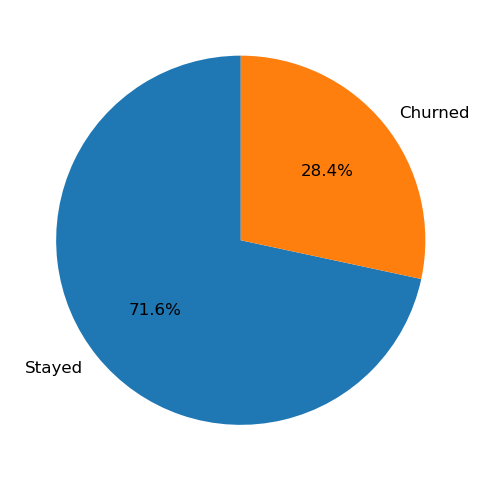

In [23]:
# Plot pie chart
plt.figure(figsize=(5,5))
total_df["Churn"].value_counts().plot.pie(
    autopct="%1.1f%%",
    labels=["Stayed", "Churned"],
    startangle=90,
    textprops={'fontsize':12}
)

plt.ylabel("")

plt.tight_layout()
plt.show()

In [24]:
churn_rate

0.2836545758081651

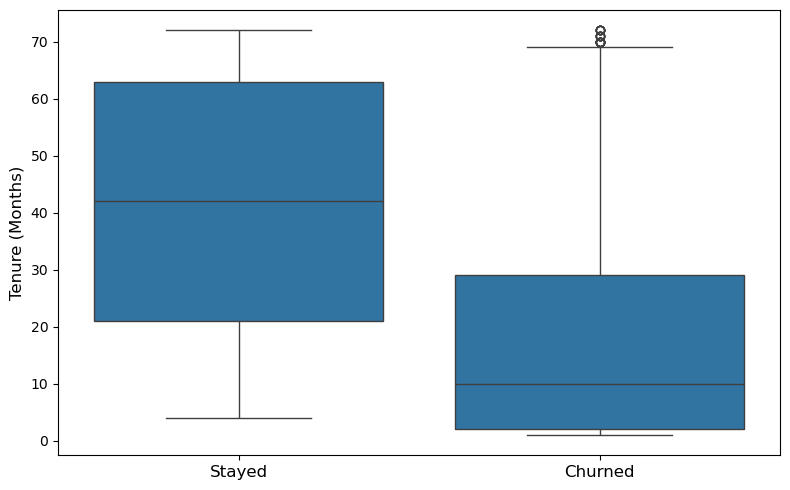

In [25]:
plt.figure(figsize=(8,5))

sns.boxplot(x="Churn", y="Tenure in Months", data=total_df)

plt.xticks([0, 1], ["Stayed", "Churned"], fontsize=12)

# Axis labels
plt.xlabel("")
plt.ylabel("Tenure (Months)", fontsize=12)

plt.tight_layout()
plt.show()

**Insights from the plot:**

Stayed Customers (Churn = 0)

Median tenure ≈ 42 months.

Most stayed customers have 20–65 months of service.

They are long-term, loyal customers.

Churned Customers (Churn = 1)

Median tenure ≈ 10 months.

Most churners leave within the first year or two.

Only a few survive longer, but they’re outliers.

**Key Takeaway**

Tenure is a strong predictor of churn.

Customers are most likely to leave early in their lifecycle.

Once customers stay past ~2 years, they are much more likely to remain loyal.

**Business Implication**

Critical Window: First 12 months → AllLife should focus retention campaigns here.

Possible actions:

Onboarding programs (welcome discounts, service tutorials).

Early loyalty rewards to prevent quick exits.

Monitor first-year experience closely (e.g., customer service calls, satisfaction surveys).

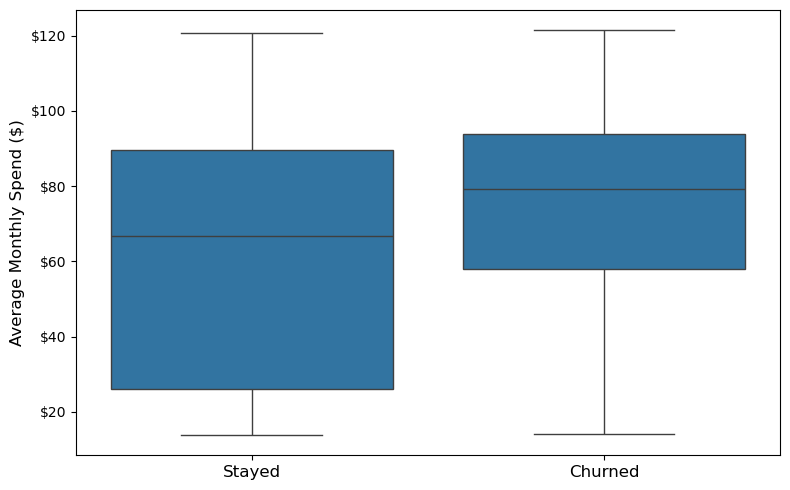

In [27]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8,5))

sns.boxplot(x="Churn", y="AvgMonthlySpend", data=total_df)

# Replace x-axis tick labels
plt.xticks([0, 1], ["Stayed", "Churned"], fontsize=12)

# Label y-axis with $ sign
plt.ylabel("Average Monthly Spend ($)", fontsize=12)
plt.xlabel("")

# Format y-axis ticks with $ sign
formatter = FuncFormatter(lambda y, _: f'${y:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)


# plt.title("Monthly Spend vs Churn")

plt.tight_layout()
plt.show()

Short-tenure customers churn more.

Very high monthly spend → higher churn risk.

## ML Model: Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Select features
features = ["Age","Married","Tenure in Months","Number of Referrals",
            "Phone Service","Multiple Lines","Internet Service","Internet Type",
            "Streaming TV","Streaming Movies","Streaming Music","Unlimited Data",
            "Payment Method","Total Charges","Total Refunds","Total Extra Data Charges",
            "Total Long Distance Charges","AvgMonthlySpend","Population"]

In [31]:
#Create dummies
X = pd.get_dummies(total_df[features], drop_first=True)
y = total_df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (baseline)
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]

# Evaluate
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1416
           1       0.72      0.65      0.68       561

    accuracy                           0.83      1977
   macro avg       0.79      0.77      0.78      1977
weighted avg       0.82      0.83      0.83      1977

ROC AUC: 0.8904133558919202


**Insights:** Our model achieves 83% accuracy with a ROC AUC of 0.89, meaning it is very effective at distinguishing churners from non-churners. While it detects about two-thirds of churners, we recommend further model optimization to reduce missed churners.

## Feature Importance

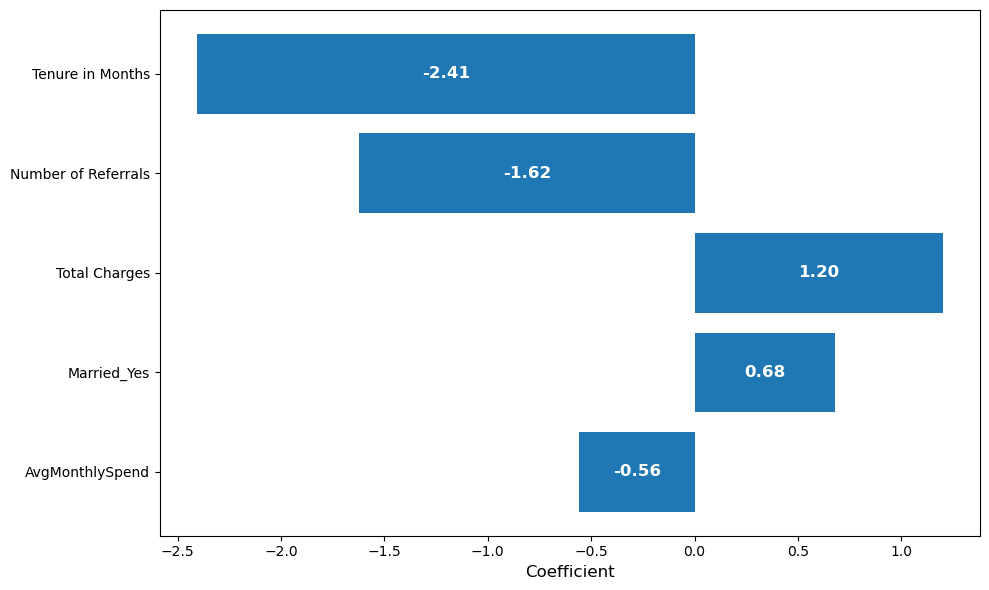

In [34]:
# Top 5 features by absolute coefficient
importance = pd.DataFrame({
    "Features": X.columns,
    "Coeff": log_reg.coef_[0]
}).sort_values("Coeff", key=abs, ascending=False).head(5)

# Reverse the DataFrame for plotting so largest on top
importance = importance[::-1]

plt.figure(figsize=(10,6))

# Draw horizontal bars with default color
bars = plt.barh(range(len(importance)), importance["Coeff"])

# Annotate inside bars
for i, row in enumerate(importance.itertuples()):
    plt.text(row.Coeff/2, i, f"{row.Coeff:.2f}", va='center', ha='center', fontsize=12, fontweight='bold', color='white')

# Set y-ticks with feature names
plt.yticks(range(len(importance)), importance["Features"])
plt.xlabel("Coefficient", fontsize=12)
plt.ylabel("")
plt.tight_layout()
plt.show()


**Insights** Customers with longer tenure are less likely to churn. Similarly, those who have provided referrals show lower churn risk. In contrast, customers with higher total charges are more likely to churn, making it a significant factor in churn prediction.

## ML Model: Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

#Train Random Forest
rf=RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1416
           1       0.81      0.58      0.68       561

    accuracy                           0.84      1977
   macro avg       0.83      0.76      0.79      1977
weighted avg       0.84      0.84      0.83      1977

ROC AUC: 0.9010928074362771


In [38]:
# Create a DataFrame of features and importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)
print(feature_importances)

                        Feature  Importance
1              Tenure in Months    0.182710
3                 Total Charges    0.143605
2           Number of Referrals    0.115822
7               AvgMonthlySpend    0.104310
6   Total Long Distance Charges    0.101282
0                           Age    0.072975
8                    Population    0.071173
14    Internet Type_Fiber Optic    0.039227
20   Payment Method_Credit Card    0.021830
12         Internet Service_Yes    0.019328


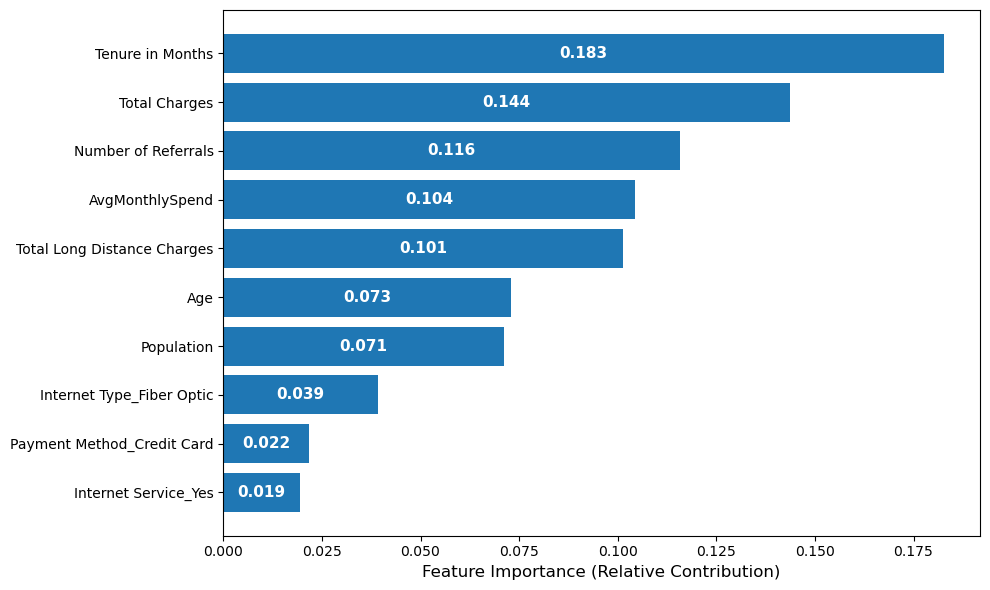

In [39]:
plt.figure(figsize=(10,6))

# Draw horizontal bars with default color
bars = plt.barh(feature_importances['Feature'], feature_importances['Importance'], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

# Invert y-axis so largest importance is on top
plt.gca().invert_yaxis()

# Annotate bars inside
for bar in bars:
    width = bar.get_width()
    plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             va='center', ha='center', fontsize=11, fontweight='bold', color='white')

# Labels and title
plt.xlabel('Feature Importance (Relative Contribution)', fontsize=12)
plt.ylabel('')
#plt.title('Top 10 Predictors of Customer Churn (Random Forest)', fontsize=14)
plt.tight_layout()
plt.show()


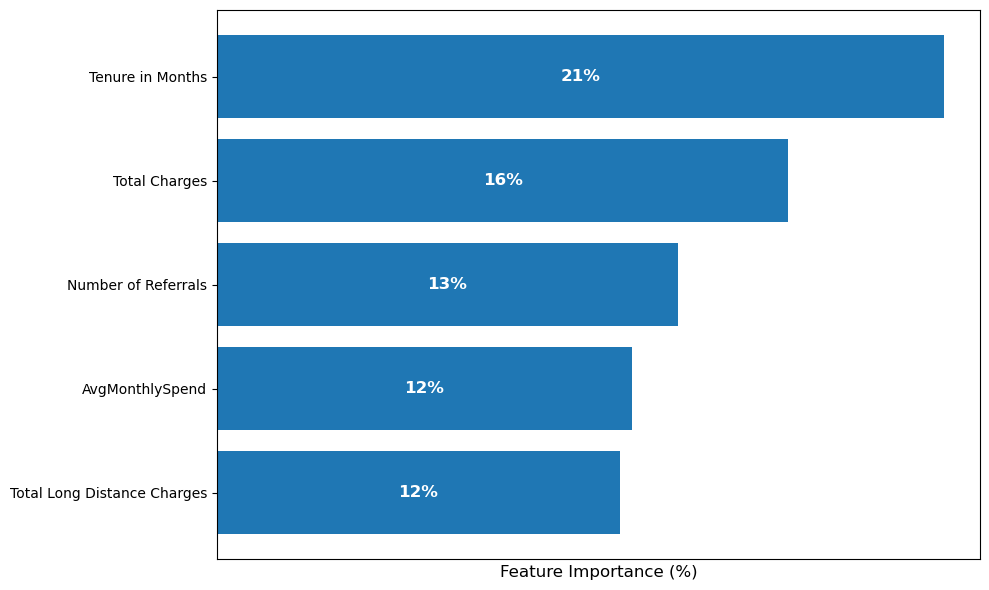

In [40]:
# Convert to percentage of total importance
feature_importances['Importance'] = (
    feature_importances['Importance'] / feature_importances['Importance'].sum()
) * 100

# Select top 5 features sorted from highest to lowest
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10,6))

# Horizontal bars
bars = plt.barh(top_features['Feature'], top_features['Importance'],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

# Invert y-axis so the largest bar is on top
plt.gca().invert_yaxis()

# Annotate bars with whole-number percentages
for bar in bars:
    width = bar.get_width()
    plt.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}%', va='center', ha='center',
             fontsize=12, fontweight='bold', color='white')

# Labels
plt.xlabel('Feature Importance (%)', fontsize=12)
plt.ylabel('')
plt.xticks([])  # remove x-axis scale for clean slide
plt.tight_layout()
plt.show()


## Model Tuning: XGBoost (Gradient Boosting)

In [42]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(
    max_depth=3,
    n_estimators=200,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42
)

xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

# Evaluate
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1416
           1       0.67      0.81      0.73       561

    accuracy                           0.83      1977
   macro avg       0.79      0.82      0.80      1977
weighted avg       0.85      0.83      0.84      1977

ROC AUC: 0.9117017633966786


In [43]:
# Get all features with their importance
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Sort them by importance (descending)
sorted_features = feature_importances.sort_values(ascending=False)

# Top 5 features
top_features = sorted_features.head(10)
print(top_features)


Internet Type_Fiber Optic      0.285164
Internet Service_Yes           0.216907
Tenure in Months               0.151014
Number of Referrals            0.089929
Payment Method_Credit Card     0.057514
AvgMonthlySpend                0.029497
Streaming Music_Yes            0.019381
Age                            0.016075
Total Long Distance Charges    0.014704
Multiple Lines_Yes             0.014194
dtype: float32


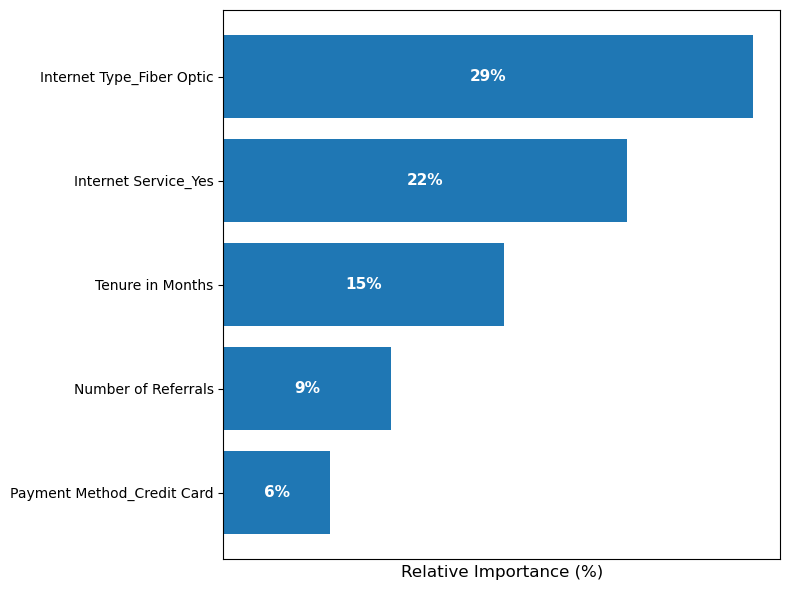

In [44]:
# Create a Series of feature importances
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Convert to percentage
feature_importances = 100 * feature_importances / feature_importances.sum()

# Select top 5 features sorted descending (highest on top)
top_features = feature_importances.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))

# Horizontal bar plot
bars = plt.barh(top_features.index, top_features.values, 
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

# Invert y-axis so the largest importance is on top
plt.gca().invert_yaxis()

# Annotate inside bars with whole-number percentages
for bar in bars:
    width = bar.get_width()
    plt.text(width/2, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', 
             va='center', ha='center', fontsize=11, fontweight='bold', color='white')

# Labels
plt.xlabel("Relative Importance (%)", fontsize=12)
plt.ylabel("")
plt.xticks([])
# plt.title("Top 5 XGBoost Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()


In [45]:
results = {
    "Logistic Regression": roc_auc_score(y_test, y_prob),
    "Random Forest": roc_auc_score(y_test, y_prob_rf),
    "XGBoost": roc_auc_score(y_test, y_prob_xgb)
}

print(results)


{'Logistic Regression': 0.8904133558919202, 'Random Forest': 0.9010928074362771, 'XGBoost': 0.9117017633966786}


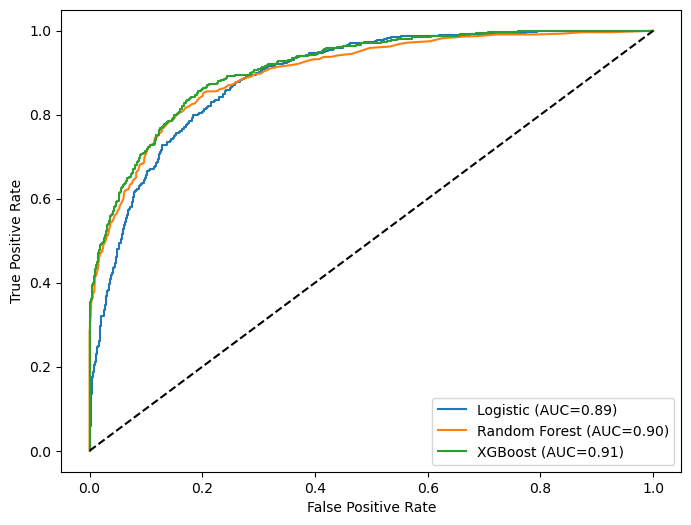

In [46]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic (AUC=%.2f)" % roc_auc_score(y_test, y_prob))

# Random Forest
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label="Random Forest (AUC=%.2f)" % roc_auc_score(y_test, y_prob_rf))

# XGBoost
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label="XGBoost (AUC=%.2f)" % roc_auc_score(y_test, y_prob_xgb))

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title("ROC Curves - Model Comparison")
plt.legend()
plt.show()

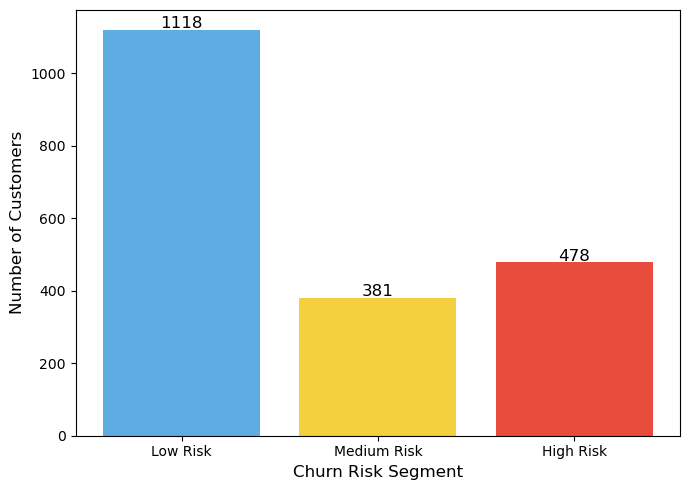

In [47]:
# predicted probabilities from XGBoost
risk_segment = pd.cut(y_prob_xgb, bins=[0,0.33,0.66,1], labels=['Low Risk','Medium Risk','High Risk'])
segment_counts = risk_segment.value_counts().sort_index()

# Plot
plt.figure(figsize=(7,5))
colors = ['#5DADE2','#F4D03F','#E74C3C']  # Low, Medium, High risk
bars = plt.bar(segment_counts.index, segment_counts.values, color=colors)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Churn Risk Segment', fontsize=12)
##plt.title('Customer Churn Risk Segmentation', fontsize=14)

# Annotate counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## Improving Model Accuracy & Impact

Retraining: update model periodically with new customer data to capture changing behaviors.

Feature engineering: create derived features (e.g., usage trends, customer lifetime value, product interactions).

Hyperparameter tuning: optimize XGBoost parameters for better recall and precision.

Additional data sources: incorporate external demographic, behavioral, or social data.

Performance monitoring: track KPIs like churn rate reduction, retention ROI, and prediction accuracy over time.


## Key Takeaways & Next Steps

XGBoost is the most effective model for identifying churners.

Top predictors: Tenure, total charges, referrals, monthly spend.

Risk segmentation allows prioritization of retention resources.

Continuous improvement: Retrain model with new data and monitor performance.

Next Steps: Integrate into marketing workflow, track KPIs, refine strategies based on results.
